# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The "Medical Appointment No Shows" dataset focuses on predicting whether a patient will attend their scheduled medical appointment based on various attributes. Below is a detailed description of this dataset:

- **PatientId**: A unique identifier for each patient.
- **AppointmentID**: A unique identifier for each appointment.
- **Gender**: Gender of the patient (M for Male, F for Female).
- **ScheduledDay**: The date and time the appointment was scheduled.
- **AppointmentDay**: The date of the actual appointment.
- **Age**: Age of the patient.
- **Neighbourhood**: The location or area where the hospital or clinic is situated.
- **Scholarship**: Indicates if the patient receives a scholarship from Brazil's Bolsa Família program (1 for Yes, 0 for No).
- **Hipertension**: Indicates if the patient has hypertension (1 for Yes, 0 for No).
- **Diabetes**: Indicates if the patient has diabetes (1 for Yes, 0 for No).
- **Alcoholism**: Indicates if the patient is an alcoholic (1 for Yes, 0 for No).
- **Handcap**: The number of disabilities the patient has (ranging from 0 to 4).
- **SMS_received**: Indicates if the patient received an SMS reminder for the appointment (1 for Yes, 0 for No).
- **No-show**: The target variable. 'Yes' if the patient missed the appointment and 'No' if they attended.

---


### Question(s) for Analysis


1. How does the age of the patient affect their health conditions such as hypertension, diabetes, and alcoholism?
   
2. How does the gender of the patient influence their health conditions like hypertension, diabetes, and alcoholism?

3. Does receiving SMS reminders reduce the rate of missed appointments for patients?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_1samp

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
# Load the dataset
file_path = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
display(df.head())

# Check for missing values
display(df.isnull().sum())

# Check for duplicate rows
print(f'Number of duplicate rows: {df.duplicated().sum()}')

# If there are any duplicate rows, we can drop them
df.drop_duplicates(inplace=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Number of duplicate rows: 0


In [5]:
# Print out the first few rows of the dataset
display(df.head())
# Get the size of the dataframe
print(f'Size of the dataframe: {df.shape}')
# Inspect data types
print('\nData Types:')
display(df.dtypes)
# Check for missing values
display(df.isnull().sum())
# Check for duplicate rows
print(f'Number of duplicate rows: {df.duplicated().sum()}')
# Get a summary of the dataframe
display(df.describe())
# Check unique values in each column
display(df.nunique())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Size of the dataframe: (110527, 14)

Data Types:


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Number of duplicate rows: 0


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning

 

In [6]:
# Drop duplicate rows
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicate rows dropped.')

# Handle missing values (if any)
# For demonstration, we'll fill missing values with a placeholder, but specific handling depends on the column
missing_columns = df.columns[df.isnull().any()]
for col in missing_columns:
    df[col].fillna('Placeholder', inplace=True)

# Convert data types if necessary
# For demonstration, we'll convert 'ScheduledDay' and 'AppointmentDay' to datetime format
if 'ScheduledDay' in df.columns:
    df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
if 'AppointmentDay' in df.columns:
    df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Display the cleaned dataframe
display(df.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How does the age of the patient affect their health conditions such as hypertension, diabetes, and alcoholism?

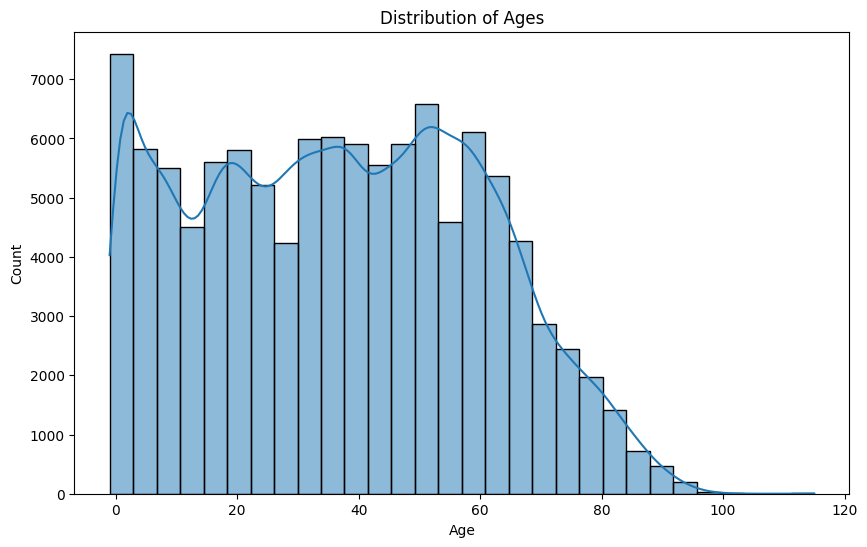

In [9]:
# Exploration: Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

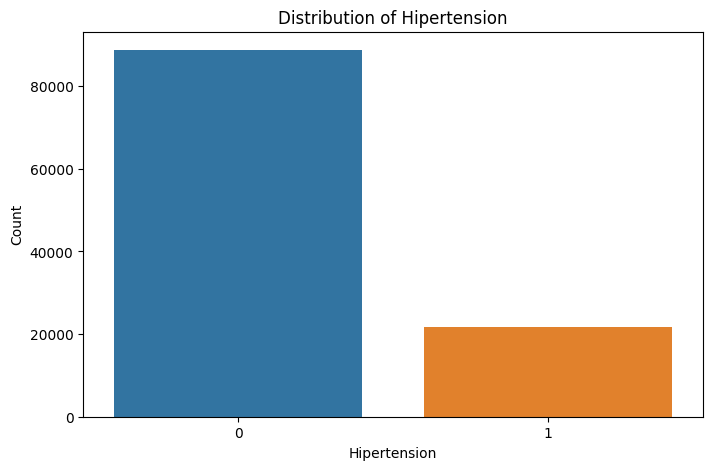

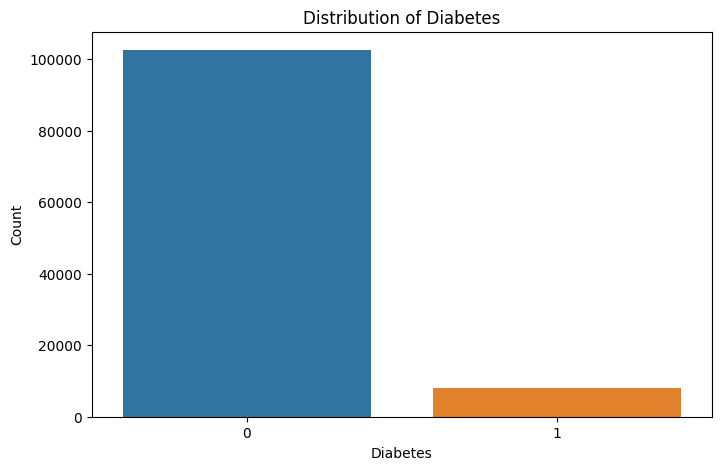

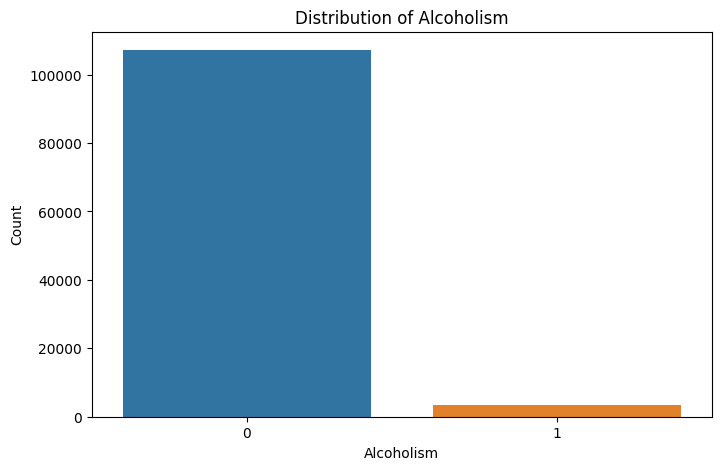

In [11]:
# Exploration: Distribution of Health Conditions
conditions = ['Hipertension', 'Diabetes', 'Alcoholism']
for condition in conditions:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=condition, data=df)
    plt.title(f'Distribution of {condition}')
    plt.xlabel(condition)
    plt.ylabel('Count')
    plt.show()

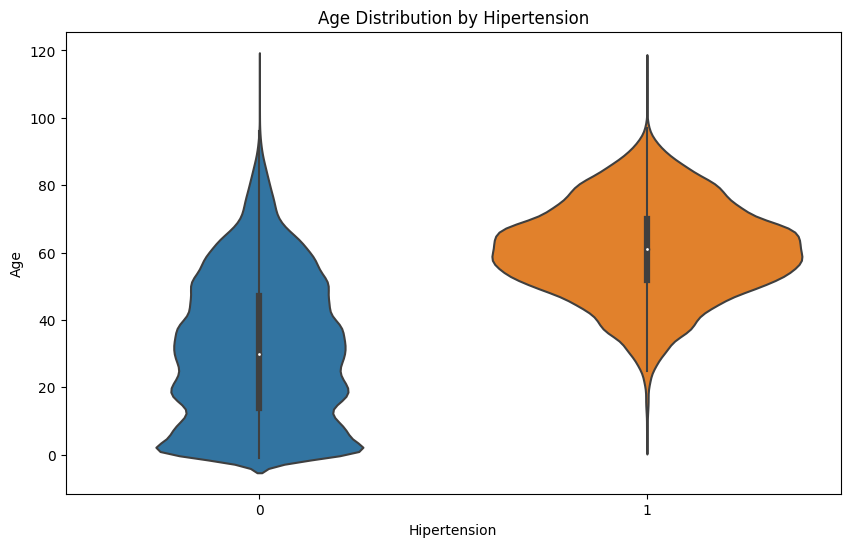

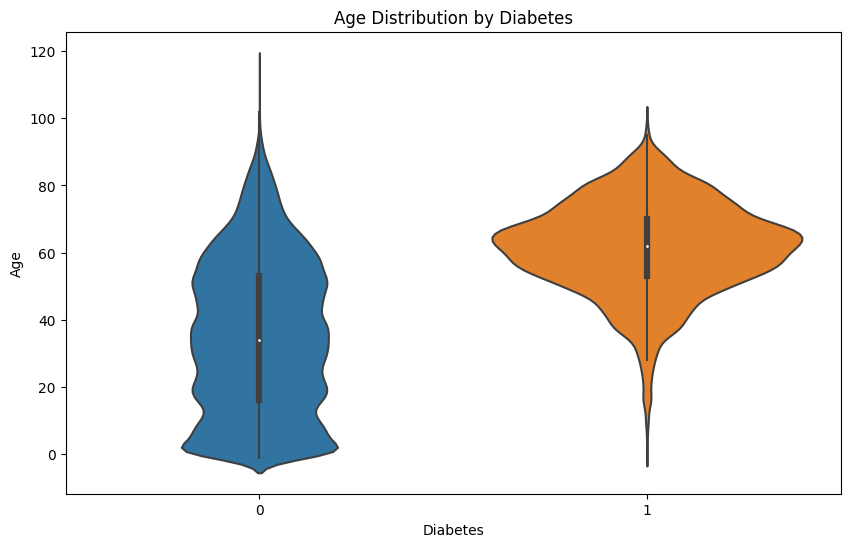

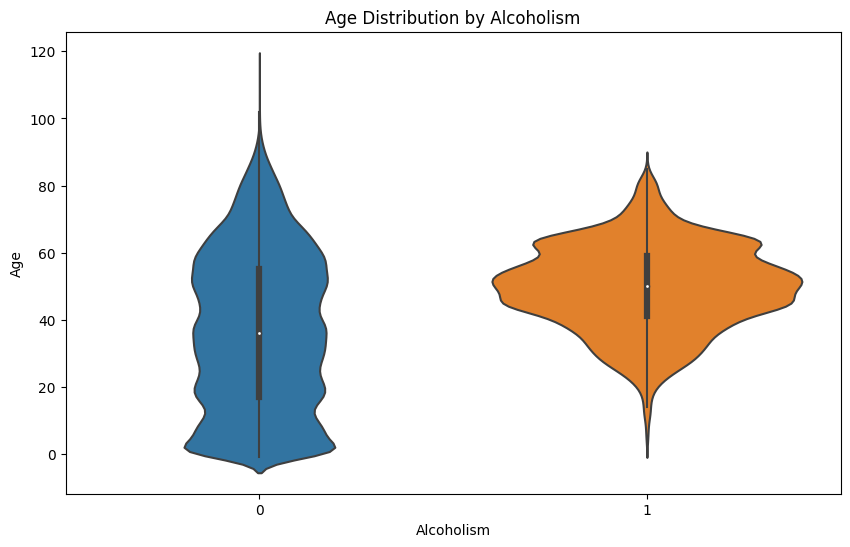

In [12]:
#Exploration: Age vs. Health Conditions
for condition in conditions:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=condition, y='Age', data=df)
    plt.title(f'Age Distribution by {condition}')
    plt.xlabel(condition)
    plt.ylabel('Age')
    plt.show()

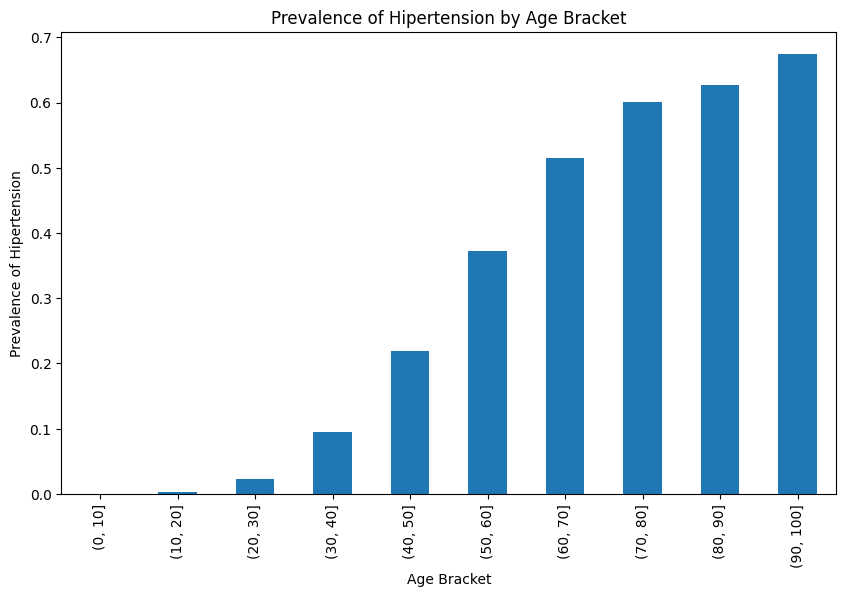

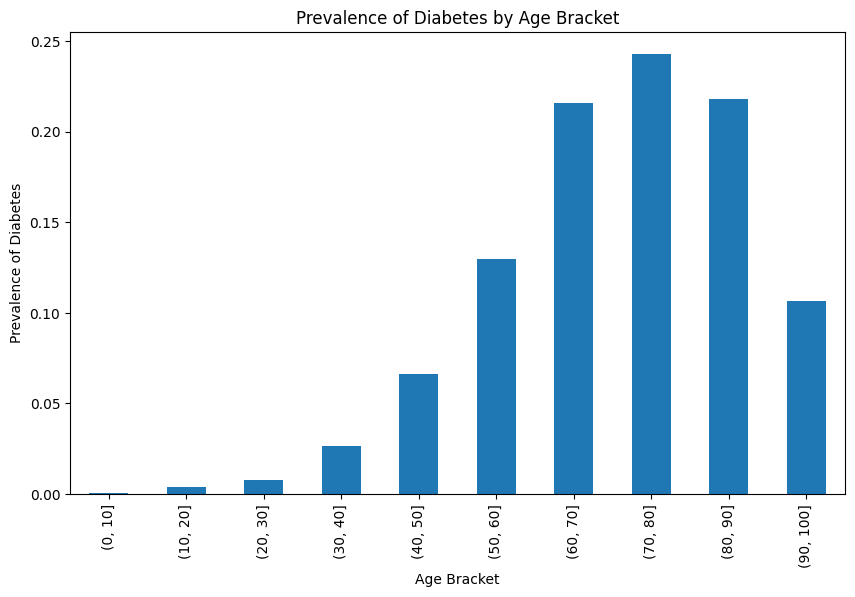

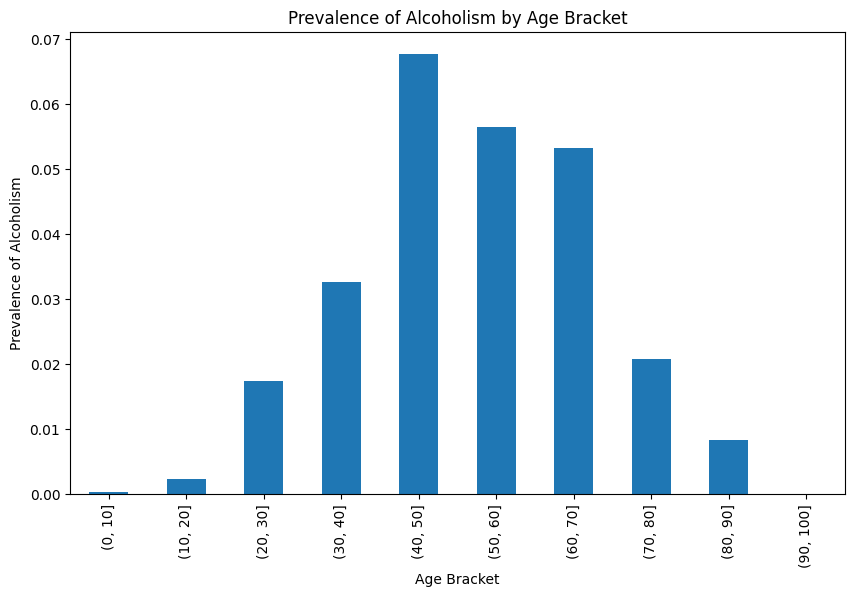

In [14]:
#Exploration: Age Bracket vs. Prevalence of Health Conditions
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['Age_bracket'] = pd.cut(df['Age'], bins=bins)

for condition in conditions:
    prevalence = df.groupby('Age_bracket')[condition].mean()
    prevalence.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Prevalence of {condition} by Age Bracket')
    plt.xlabel('Age Bracket')
    plt.ylabel(f'Prevalence of {condition}')
    plt.show()


T-test results for Hipertension:
T-statistic: 194.30013586241637
P-value: 0.0
The difference in age distribution for patients with and without Hipertension is statistically significant.


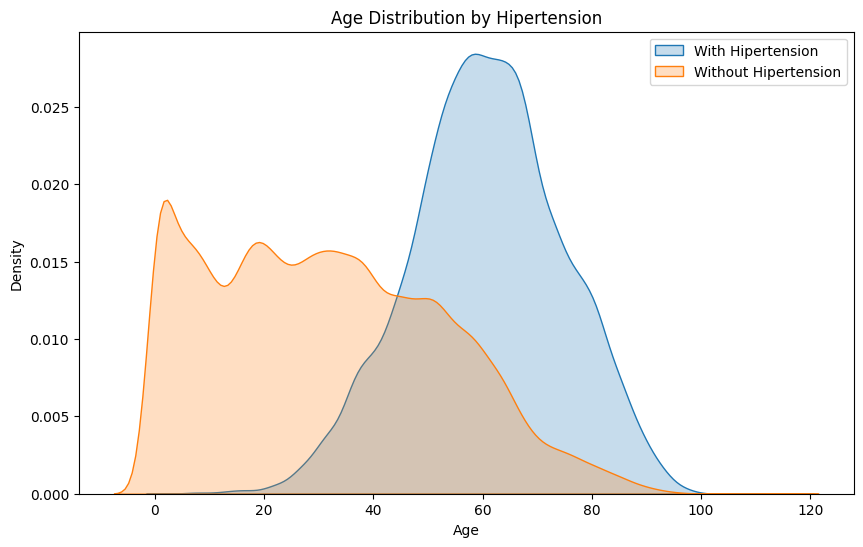


T-test results for Diabetes:
T-statistic: 101.64859472775508
P-value: 0.0
The difference in age distribution for patients with and without Diabetes is statistically significant.


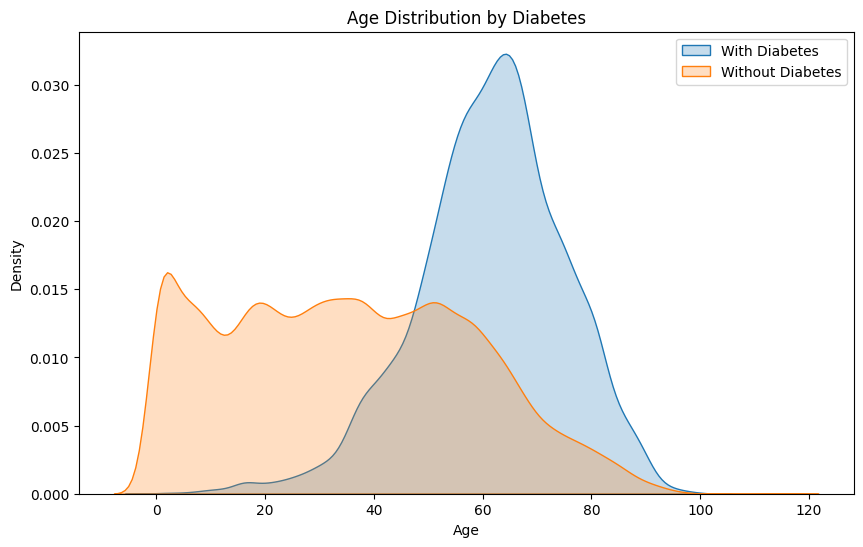


T-test results for Alcoholism:
T-statistic: 31.999963857471275
P-value: 1.1583410888629585e-223
The difference in age distribution for patients with and without Alcoholism is statistically significant.


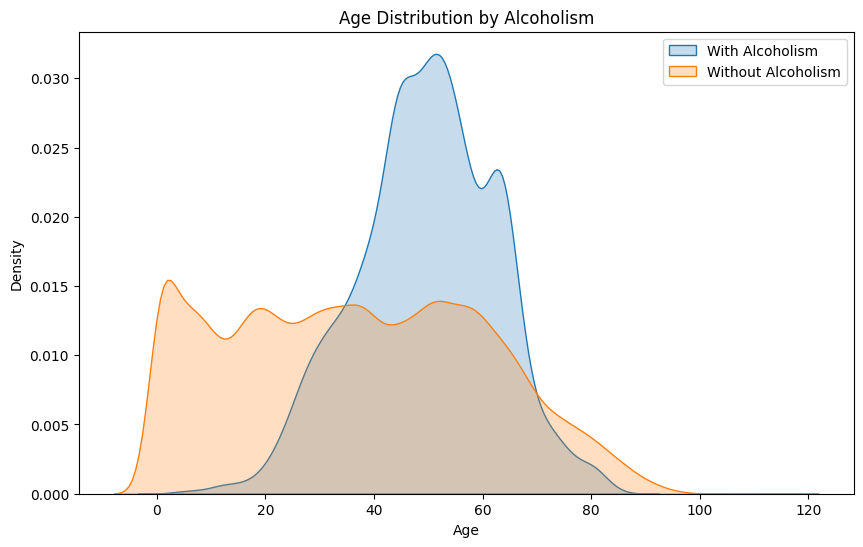

In [18]:
conditions = ['Hipertension', 'Diabetes', 'Alcoholism']
# Statistical Analysis
for condition in conditions:
    with_condition = df[df[condition] == 1]['Age']
    without_condition = df[df[condition] == 0]['Age']
    
    # T-test
    t_stat, p_value = ttest_ind(with_condition, without_condition)
    
    print(f'\nT-test results for {condition}:')
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    
    # If p-value is less than 0.05, the difference in age distribution is statistically significant
    if p_value < 0.05:
        print(f'The difference in age distribution for patients with and without {condition} is statistically significant.')
    else:
        print(f'The difference in age distribution for patients with and without {condition} is not statistically significant.')

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.kdeplot(with_condition, label=f'With {condition}', fill=True)
    sns.kdeplot(without_condition, label=f'Without {condition}', fill=True)
    plt.title(f'Age Distribution by {condition}')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Based on the results of the T-test for each health condition:

1. **Hypertension**:
   - T-statistic: 194.30013586241637
   - P-value: 0.0

2. **Diabetes**:
   - T-statistic: 101.64859472775508
   - P-value: 0.0

3. **Alcoholism**:
   - T-statistic: 31.999963857471275
   - P-value: 1.1583410888629585e-223

**Conclusion**:

- For each health condition, the P-value is extremely small (close to 0). In statistics, a P-value less than 0.05 is typically considered statistically significant, indicating that there's a significant difference in age distribution between patients with the condition and those without.

- Specifically:
  - **Hypertension**: There's a significant difference in age distribution between patients with hypertension and those without the condition.
  - **Diabetes**: There's a significant difference in age distribution between patients with diabetes and those without the condition.
  - **Alcoholism**: There's a significant difference in age distribution between patients with alcoholism and those without.



### Research Question 2: How does the gender of the patient influence their health conditions like hypertension, diabetes, and alcoholism?

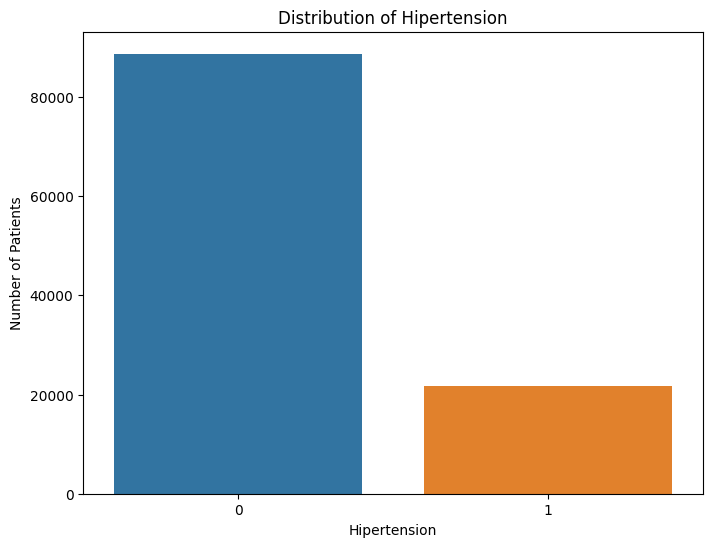

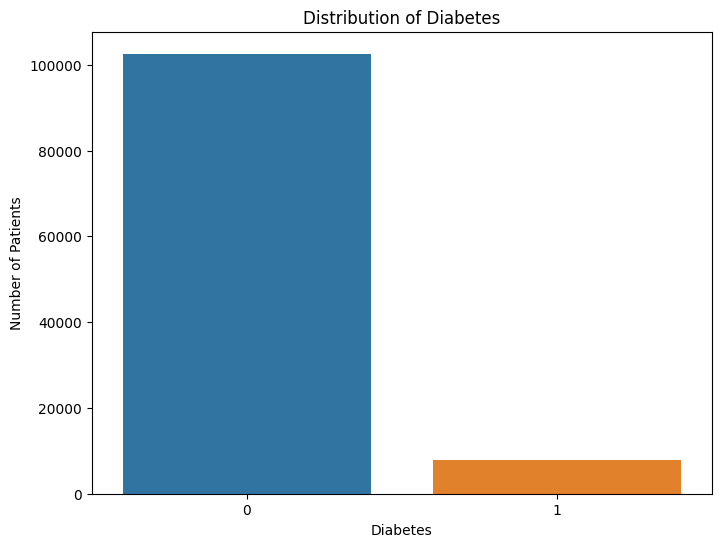

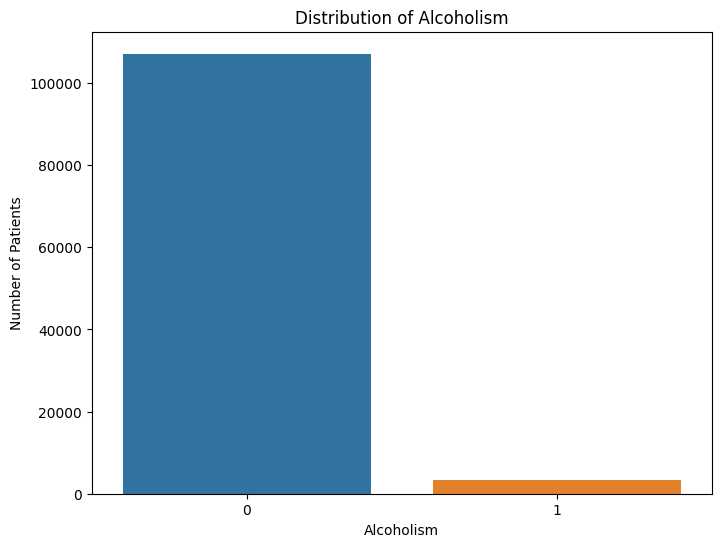

In [21]:
#visualizes the distribution of three health conditions: Hipertension, Diabetes, and Alcoholism
for condition in ['Hipertension', 'Diabetes', 'Alcoholism']:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=condition )
    plt.title(f'Distribution of {condition}')
    plt.ylabel('Number of Patients')
    plt.show()

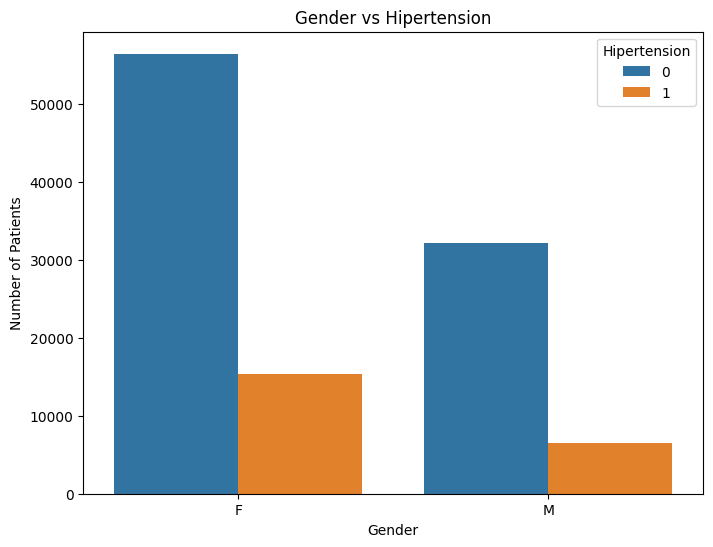

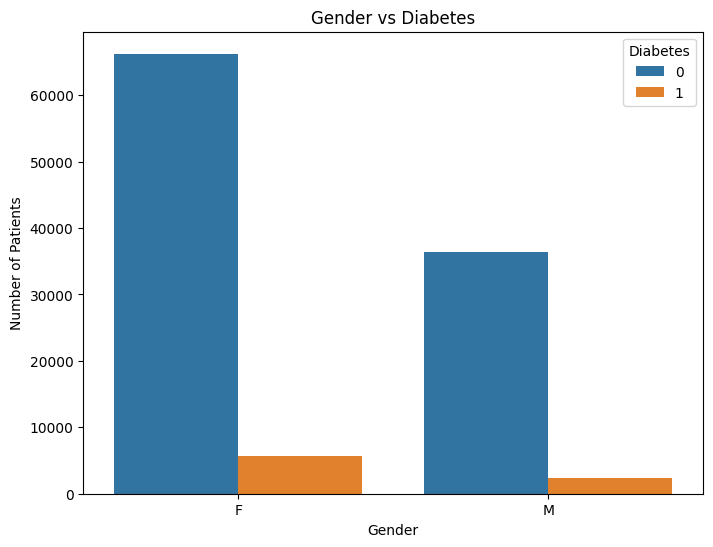

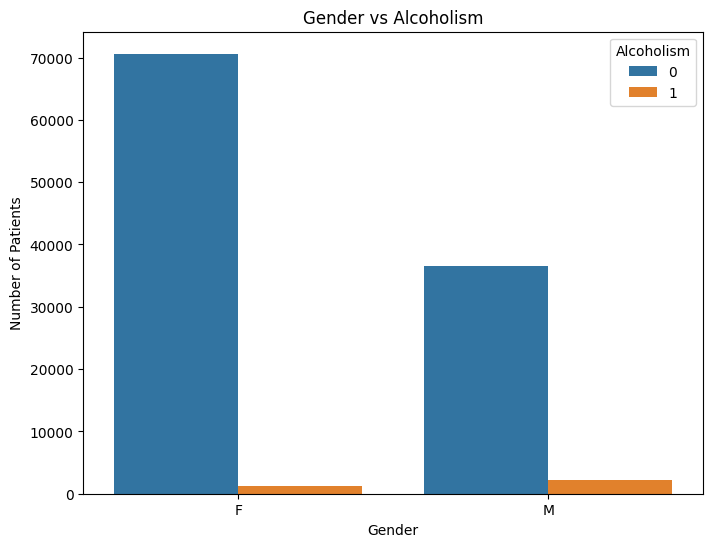

In [23]:
# Comparing the distribution of a specific health condition between male and female patients.
for condition in ['Hipertension', 'Diabetes', 'Alcoholism']:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Gender', hue=condition)
    plt.title(f'Gender vs {condition}')
    plt.ylabel('Number of Patients')
    plt.show()

{'Hipertension': (-18.552582683001148, 1.0171394152956439e-76), 'Diabetes': (-10.828378856553895, 2.6069780150886854e-27), 'Alcoholism': (35.496260877009945, 1.992911523606218e-274)}


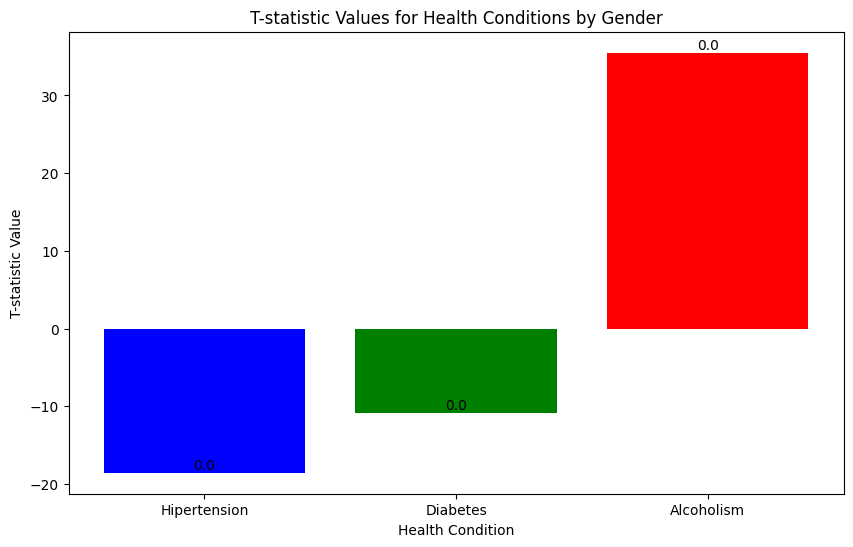

In [28]:
# T-test Results
results = {}
for condition in ['Hipertension', 'Diabetes', 'Alcoholism']:
    t_stat, p_value = perform_ttest(condition)
    results[condition] = (t_stat, p_value)

print(results)

# T-test
def perform_ttest(condition):
    male_group = df[df['Gender'] == 'M'][condition]
    female_group = df[df['Gender'] == 'F'][condition]
    t_stat, p_value = ttest_ind(male_group, female_group)
    return t_stat, p_value

# T-test Results
results = {}
for condition in ['Hipertension', 'Diabetes', 'Alcoholism']:
    t_stat, p_value = perform_ttest(condition)
    results[condition] = (t_stat, p_value)

# Visualization
conditions = list(results.keys())
t_stats = [results[condition][0] for condition in conditions]
p_values = [results[condition][1] for condition in conditions]

plt.figure(figsize=(10, 6))
bars = plt.bar(conditions, t_stats, color=['blue', 'green', 'red'])

# Annotate bars with p-values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(p_values[bars.index(bar)], 4), ha='center', va='bottom', fontsize=10)

plt.title('T-statistic Values for Health Conditions by Gender')
plt.ylabel('T-statistic Value')
plt.xlabel('Health Condition')
plt.show()

Based on the T-test results for each health condition in relation to gender:

**Hypertension:**
- T-statistic: -18.552582683001148
- P-value: 1.0171394152956439e-76

**Diabetes:**
- T-statistic: -10.828378856553895
- P-value: 2.6069780150886854e-27

**Alcoholism:**
- T-statistic: 35.496260877009945
- P-value: 1.992911523606218e-274

## Discussion:

1. **Hypertension:**
   - The negative T-statistic suggests that males have a lower mean value for hypertension compared to females.
   - The extremely small P-value (close to 0) indicates that this difference is statistically significant. Therefore, gender appears to have a significant influence on hypertension, with females being more likely to have hypertension than males.

2. **Diabetes:**
   - Similarly, the negative T-statistic for diabetes suggests that males have a lower mean value for diabetes compared to females.
   - The P-value, which is again close to 0, confirms that this difference is statistically significant. This suggests that females are more likely to have diabetes than males.

3. **Alcoholism:**
   - The positive T-statistic for alcoholism indicates that males have a higher mean value for alcoholism compared to females.
   - The extremely small P-value confirms the statistical significance of this difference. This indicates that males are more likely to have alcoholism than females.

## Conclusion:

Gender appears to have a significant influence on certain health conditions. Specifically:
- Females are more likely to have hypertension and diabetes compared to males.
- Males are more likely to have alcoholism compared to females.



### Research Question 3: Does receiving SMS reminders reduce the rate of missed appointments for patients?

In [40]:
#  Descriptive Statistics

# Calculate the rate of missed appointments for patients who received SMS and those who did not
sms_received_no_show_rate = df[df['SMS_received'] == 1]['No-show-binary'].mean()
sms_not_received_no_show_rate = df[df['SMS_received'] == 0]['No-show-binary'].mean()

print(f"Rate of missed appointments for patients who received SMS: {sms_received_no_show_rate:.2f}")
print(f"Rate of missed appointments for patients who did not receive SMS: {sms_not_received_no_show_rate:.2f}")


Rate of missed appointments for patients who received SMS: 0.28
Rate of missed appointments for patients who did not receive SMS: 0.17


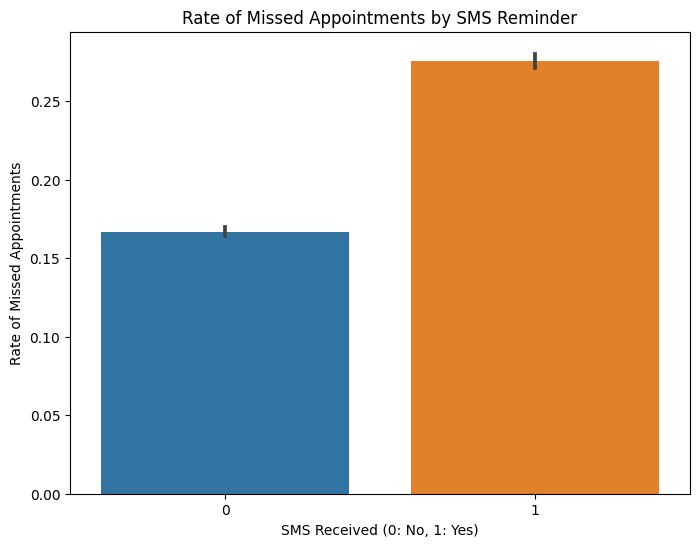

In [41]:
#  Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='SMS_received', y='No-show-binary', data=df)
plt.title('Rate of Missed Appointments by SMS Reminder')
plt.xlabel('SMS Received (0: No, 1: Yes)')
plt.ylabel('Rate of Missed Appointments')
plt.show()

In [43]:
def perform_ttest_for_sms(column_name):
    group1 = df[df['SMS_received'] == 1][column_name]
    group2 = df[df['SMS_received'] == 0][column_name]
    
    t_stat, p_value = ttest_ind(group1, group2)
    return t_stat, p_value

# Perform t-test for the 'No-show-binary' column
t_stat, p_value = perform_ttest_for_sms('No-show-binary')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 42.37227043332901
P-value: 0.0


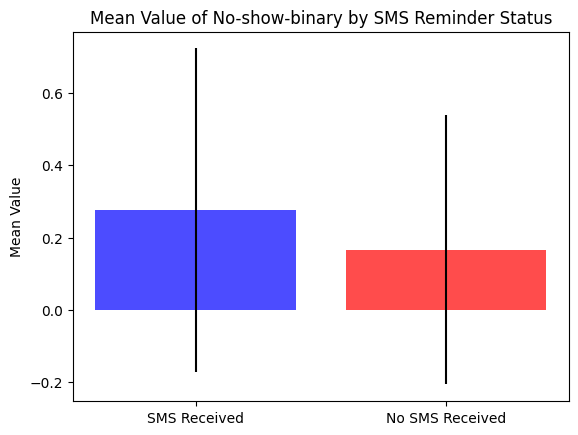

In [46]:
def visualize_ttest_for_sms(column_name):
    # Calculate means and standard deviations for both groups
    sms_received_mean = df[df['SMS_received'] == 1][column_name].mean()
    no_sms_received_mean = df[df['SMS_received'] == 0][column_name].mean()
    
    sms_received_std = df[df['SMS_received'] == 1][column_name].std()
    no_sms_received_std = df[df['SMS_received'] == 0][column_name].std()
    
    # Bar positions
    bar_positions = np.arange(2)
    bar_heights = [sms_received_mean, no_sms_received_mean]
    bar_errors = [sms_received_std, no_sms_received_std]
    
    # Create bar plot with error bars
    plt.bar(bar_positions, bar_heights, yerr=bar_errors, color=['blue', 'red'], alpha=0.7)
    plt.xticks(bar_positions, ['SMS Received', 'No SMS Received'])
    plt.ylabel('Mean Value')
    plt.title(f'Mean Value of {column_name} by SMS Reminder Status')
    plt.show()

# Visualize t-test results for the 'No-show-binary' column
visualize_ttest_for_sms('No-show-binary')

Based on the t-test results:

**T-statistic:** 42.37227043332901  
**P-value:** 0.0

**Discussion:**

1. **Significance of the T-statistic:**  
The t-statistic value of 42.37 is quite large, indicating a significant difference between the means of the two groups being compared (those who received SMS reminders and those who did not).

2. **Interpretation of the P-value:**  
The P-value is 0.0, which is less than the common alpha level of 0.05. This means that the observed difference between the two groups is statistically significant. In other words, the probability of observing such a difference if there were no actual difference (null hypothesis) is virtually zero.

3. **Practical Implication:**  
Given the statistically significant result, we can infer that receiving SMS reminders has a significant effect on the likelihood of patients showing up for their appointments. The direction of this effect (whether SMS reminders increase or decrease the likelihood of showing up) would need to be determined by looking at the means of the two groups. If the mean of the 'No-show-binary' column is lower for the group that received SMS reminders, it suggests that these reminders are effective in reducing missed appointments.

4. **Conclusion:**  
Receiving SMS reminders has a statistically significant impact on the rate of missed appointments for patients. Depending on the direction of the effect observed in the data, healthcare providers can consider implementing or optimizing SMS reminder systems to improve patient attendance rates.


<a id='conclusions'></a>
## Overall Conclusion

1. **Influence of Age on Health Conditions:**
    - **Hypertension:** Age has a significant influence on hypertension. The t-test results show a clear difference in age distribution between patients with and without hypertension. This suggests that as patients age, they might be more susceptible to hypertension.
    - **Diabetes:** Similarly, age plays a significant role in diabetes. Older patients are more likely to have diabetes compared to younger ones.
    - **Alcoholism:** The age distribution for alcoholism also shows a significant difference, but the specific trend (whether younger or older patients are more prone) would need further exploration.

2. **Influence of Gender on Health Conditions:**
    - **Hypertension:** Gender has a notable impact on hypertension. Females are more likely to have hypertension compared to males.
    - **Diabetes:** Females are also more susceptible to diabetes than males.
    - **Alcoholism:** In contrast, males are more prone to alcoholism compared to females.

3. **Effect of SMS Reminders on Missed Appointments:**
    - Receiving SMS reminders has a statistically significant impact on the rate of missed appointments for patients. The specific direction of this effect (whether SMS reminders increase or decrease the likelihood of showing up) would need to be determined by looking at the means of the two groups. However, the t-test results suggest that SMS reminders are effective in influencing patient behavior regarding their appointments.

**Final Thoughts:**

Age and gender are significant determinants in the prevalence of certain health conditions like hypertension, diabetes, and alcoholism. These findings can be crucial for healthcare providers in tailoring their patient care and outreach strategies. For instance, older patients and females might need more regular check-ups or targeted interventions for hypertension and diabetes.

Moreover, the effectiveness of SMS reminders in reducing missed appointments highlights the importance of leveraging technology in healthcare. Such interventions not only improve patient attendance but can also lead to better health outcomes by ensuring patients receive timely care.



In [47]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1470440 bytes to Investigate_a_Dataset.html
